 # Circular dichroism for chiral enantiomers
 In this notebook we calculate the the optical spectra and local-field of a symmetric AuAg dimer.The notebook is structured as follows:
 *  **Importing the libraries:** setup of useful settings and import of necessary libraries and databases.
 *  **Setting up the inputs:** definition of the inputs of the simulation.
 *  **Performing the calculations**: call to py_gmm to compute all the relevant far-field and local field quantities.
 *  **Plotting the results**: plot of the integral cross-sections and the cd signal

In [1]:
#------Library loading------

# numpy for matrix computations
import numpy as np; import numpy.ma as ma

# system libraries
import sys

# plotting libraries
%matplotlib inline
import matplotlib.pylab as plt

# Generalized Multiparticle Mie import
sys.path.append('../')
import py_gmm

# Setting up the inputs

### Target inputs (optical constant database, sphere coordinates, composition and size)

In [2]:
# building the optical constant database
eps_db_out=py_gmm.mat.generate_eps_db('../epsilon/',ext='*.edb')
eps_files,eps_names,eps_db=eps_db_out['eps_files'],eps_db_out['eps_names'],eps_db_out['eps_db']

# sphere radius (in nm)
v_r = np.array([40.,  40., 40.,  40.,  40.])

# left enantiomer sphere position (in nm)
m_xyz_l = np.array([[0.0,   200.0 ,   0. ],
                    [0.0,   100.0 ,   0. ],
                    [0.0,   0.0 ,   0. ],
                    [100.0, 0. ,   0. ],
                    [100.0, 0. ,   100.0 ]])

# right enantiomer sphere position (in nm)
m_xyz_r = np.array([[0.0,   200.0 ,   0. ],
                    [0.0,   100.0 ,   0. ],
                    [0.0,   0.0 ,   0. ],
                    [-100.0, 0. ,   0. ],
                    [-100.0, 0. ,   100.0 ]])

# how many spheres in the target? We guess it from the length of the radius vector
ns = len(v_r)

# sphere composition, calling the names contained in "eps_names", just populated above
target_comp= np.array(['eAgPalikSTDf','eAgPalikSTDf','eAgPalikSTDf','eAgPalikSTDf','eAgPalikSTDf']) # vector containing the optical constants names

# refractive index of the environment
n_matrix = 1.33  # water

### Plane wave incident field

In [3]:
# Euler angles: (alpha,beta,gamma)=(0,0,0) means a z-directed, x-polarized plane wave
alpha = 0.0   # azimuth
beta = 0.0  # polar
gamma = 0.0  # polarization

# Wavelengths for the specrum computation
wl_min = 300
wl_max = 800
n_wl = 250
v_wl = np.linspace(wl_min,wl_max,n_wl)

### Additional inputs for the simulation

In [4]:
n_stop=5 # maximum multipolar expansion order
f_int=0.0; # interaction cutoff (normally set to zero to have full interactions)
lf_ratio=300; # plot sphere local field contribution up to a distance equal to d=lf_ratio*r_sphere
qs_flag='no' # retarded simulation

# Performing the calculations

### Scattering cross sections and field expansion coefficients for the left enantiomer, left polarization

In [10]:
# computing the expansion coefficients and cross sections with a loop
m_abcd_ext_sca_abs = []  # list to be filled with the output
for wl in v_wl:
    
    # retrieving optical constants at wl from the database
    e_list=py_gmm.mat.db_to_eps(wl,eps_db,target_comp);
    m_eps=np.column_stack((np.real(e_list),np.imag(e_list)));
    
    # solving the gmm problem (calculating the cross sections and the expansion coefficients)
    out=py_gmm.gmm_py.gmm_f2py_module.expansion_coefficients(m_xyz_l, # target sphere position in nm
                                                      v_r,   # target sphere radii in nm
                                                      m_eps, # e1 and e2 for each sphere
                                                      f_int,  # interaction coefficient
                                                      n_matrix, # environment refractive index
                                                      wl, # computation wavelength
                                                      alpha,beta,gamma, # euler angles for the incident pw
                                                      1, # =0 Linear, =1 Left Circular, =2 Right Circular
                                                      n_stop, # maximum number for expansion coefficients
                                                      qs_flag) # quasi static approximation
    m_abcd_ext_sca_abs.append(out)
    
# extracting coefficients and cross section
v_coeff_l_l=[];v_cext_l_l=[];v_csca_l_l=[];v_cabs_l_l=[];
for out in m_abcd_ext_sca_abs:
    v_coeff_l_l.append(out[0]);
    v_cext_l_l.append(out[1]);
    v_csca_l_l.append(out[2]);
    v_cabs_l_l.append(out[3]);

# converting the lists to numpy arrays
v_cext_l_l=np.array(v_cext_l_l)
v_csca_l_l=np.array(v_csca_l_l)
v_cabs_l_l=np.array(v_cabs_l_l)

### Scattering cross sections and field expansion coefficients for the left enantiomer, right polarization

In [11]:
# computing the expansion coefficients and cross sections with a loop
m_abcd_ext_sca_abs = []  # list to be filled with the output
for wl in v_wl:
    
    # retrieving optical constants at wl from the database
    e_list=py_gmm.mat.db_to_eps(wl,eps_db,target_comp);
    m_eps=np.column_stack((np.real(e_list),np.imag(e_list)));
    
    # solving the gmm problem (calculating the cross sections and the expansion coefficients)
    out=py_gmm.gmm_py.gmm_f2py_module.expansion_coefficients(m_xyz_l, # target sphere position in nm
                                                      v_r,   # target sphere radii in nm
                                                      m_eps, # e1 and e2 for each sphere
                                                      f_int,  # interaction coefficient
                                                      n_matrix, # environment refractive index
                                                      wl, # computation wavelength
                                                      alpha,beta,gamma, # euler angles for the incident pw
                                                      2, # =0 Linear, =1 Left Circular, =2 Right Circular
                                                      n_stop, # maximum number for expansion coefficients
                                                      qs_flag) # quasi static approximation
    m_abcd_ext_sca_abs.append(out)
    
# extracting coefficients and cross section
v_coeff_l_r=[];v_cext_l_r=[];v_csca_l_r=[];v_cabs_l_r=[];
for out in m_abcd_ext_sca_abs:
    v_coeff_l_r.append(out[0]);
    v_cext_l_r.append(out[1]);
    v_csca_l_r.append(out[2]);
    v_cabs_l_r.append(out[3]);

# converting the lists to numpy arrays
v_cext_l_r=np.array(v_cext_l_r)
v_csca_l_r=np.array(v_csca_l_r)
v_cabs_l_r=np.array(v_cabs_l_r)

### Scattering cross sections and field expansion coefficients for the right enantiomer, left polarization

In [12]:
# computing the expansion coefficients and cross sections with a loop
m_abcd_ext_sca_abs = []  # list to be filled with the output
for wl in v_wl:
    
    # retrieving optical constants at wl from the database
    e_list=py_gmm.mat.db_to_eps(wl,eps_db,target_comp);
    m_eps=np.column_stack((np.real(e_list),np.imag(e_list)));
    
    # solving the gmm problem (calculating the cross sections and the expansion coefficients)
    out=py_gmm.gmm_py.gmm_f2py_module.expansion_coefficients(m_xyz_r, # target sphere position in nm
                                                      v_r,   # target sphere radii in nm
                                                      m_eps, # e1 and e2 for each sphere
                                                      f_int,  # interaction coefficient
                                                      n_matrix, # environment refractive index
                                                      wl, # computation wavelength
                                                      alpha,beta,gamma, # euler angles for the incident pw
                                                      1, # =0 Linear, =1 Left Circular, =2 Right Circular
                                                      n_stop, # maximum number for expansion coefficients
                                                      qs_flag) # quasi static approximation
    m_abcd_ext_sca_abs.append(out)
    
# extracting coefficients and cross section
v_coeff_r_l=[];v_cext_r_l=[];v_csca_r_l=[];v_cabs_r_l=[];
for out in m_abcd_ext_sca_abs:
    v_coeff_r_l.append(out[0]);
    v_cext_r_l.append(out[1]);
    v_csca_r_l.append(out[2]);
    v_cabs_r_l.append(out[3]);

# converting the lists to numpy arrays
v_cext_r_l=np.array(v_cext_r_l)
v_csca_r_l=np.array(v_csca_r_l)
v_cabs_r_l=np.array(v_cabs_r_l)

### Scattering cross sections and field expansion coefficients for the right enantiomer, right polarization

In [13]:
# computing the expansion coefficients and cross sections with a loop
m_abcd_ext_sca_abs = []  # list to be filled with the output
for wl in v_wl:
    
    # retrieving optical constants at wl from the database
    e_list=py_gmm.mat.db_to_eps(wl,eps_db,target_comp);
    m_eps=np.column_stack((np.real(e_list),np.imag(e_list)));
    
    # solving the gmm problem (calculating the cross sections and the expansion coefficients)
    out=py_gmm.gmm_py.gmm_f2py_module.expansion_coefficients(m_xyz_r, # target sphere position in nm
                                                      v_r,   # target sphere radii in nm
                                                      m_eps, # e1 and e2 for each sphere
                                                      f_int,  # interaction coefficient
                                                      n_matrix, # environment refractive index
                                                      wl, # computation wavelength
                                                      alpha,beta,gamma, # euler angles for the incident pw
                                                      2, # =0 Linear, =1 Left Circular, =2 Right Circular
                                                      n_stop, # maximum number for expansion coefficients
                                                      qs_flag) # quasi static approximation
    m_abcd_ext_sca_abs.append(out)
    
# extracting coefficients and cross section
v_coeff_r_r=[];v_cext_r_r=[];v_csca_r_r=[];v_cabs_r_r=[];
for out in m_abcd_ext_sca_abs:
    v_coeff_r_r.append(out[0]);
    v_cext_r_r.append(out[1]);
    v_csca_r_r.append(out[2]);
    v_cabs_r_r.append(out[3]);

# converting the lists to numpy arrays
v_cext_r_r=np.array(v_cext_r_r)
v_csca_r_r=np.array(v_csca_r_r)
v_cabs_r_r=np.array(v_cabs_r_r)

# Plotting the results

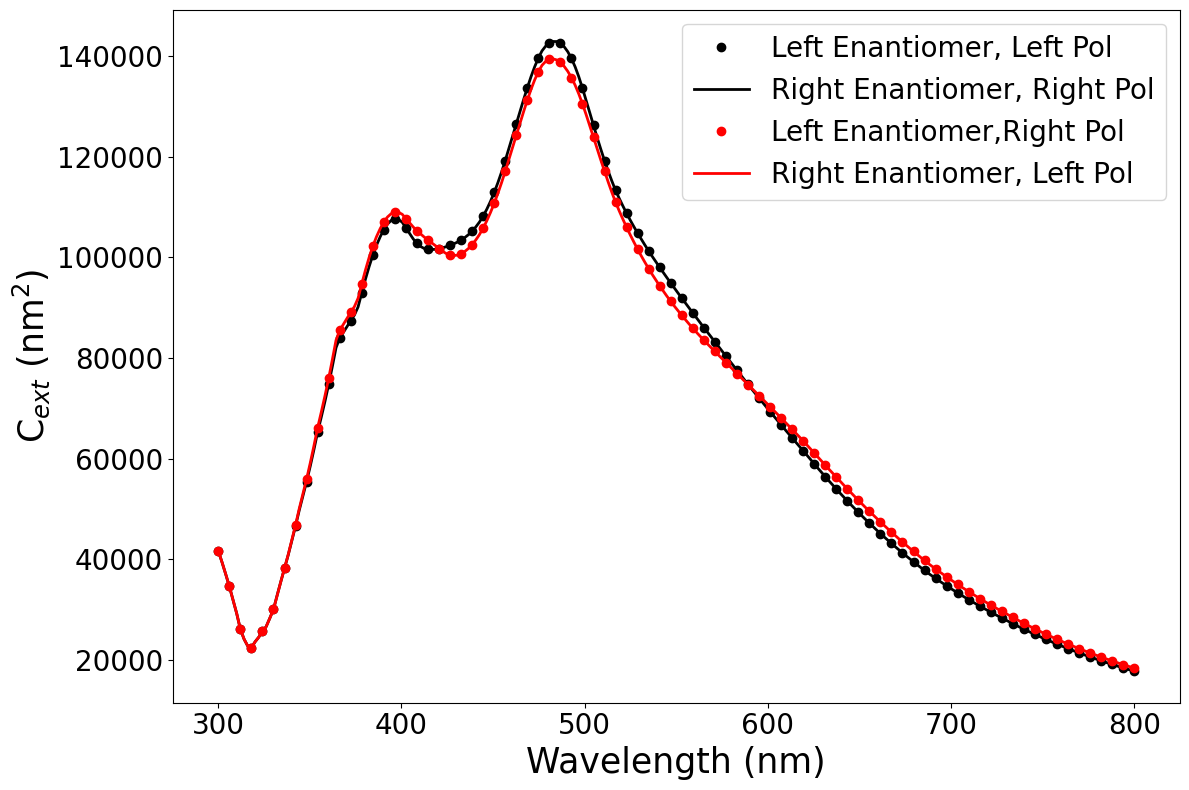

In [26]:
# cross section plot
f_size=25;
f_size_ticks=20;
plt.figure(1,figsize=(12,8));
plt.plot(v_wl,np.sum(v_cext_l_l,axis=1),'ko',linewidth=3.0,markevery=3);
plt.plot(v_wl,np.sum(v_cext_r_r,axis=1),'k',linewidth=2.0);
plt.plot(v_wl,np.sum(v_cext_l_r,axis=1),'ro',linewidth=3.0,markevery=3);
plt.plot(v_wl,np.sum(v_cext_r_l,axis=1),'r',linewidth=2.0);

# axes labels
plt.xlabel(r'Wavelength (nm)', fontsize=f_size)
plt.ylabel(r'C$_{ext}$ (nm$^{2}$)', fontsize=f_size)

# ticks
plt.xticks(fontsize=f_size_ticks)
plt.yticks(fontsize=f_size_ticks)

# legend
plt.legend((r'Left Enantiomer, Left Pol',
            r'Right Enantiomer, Right Pol',
            r'Left Enantiomer,Right Pol',
            r'Right Enantiomer, Left Pol',),fontsize=f_size-5)

# layout
plt.tight_layout()

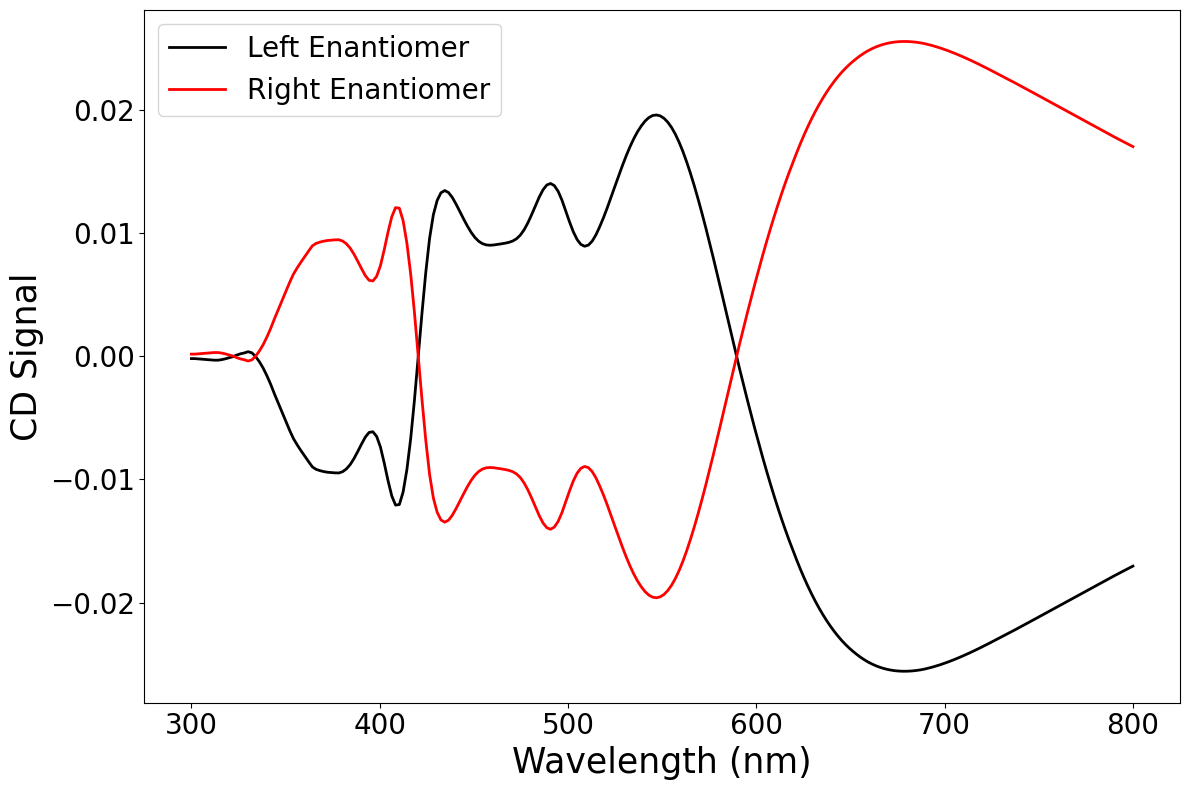

In [28]:
# cross section plot
f_size=25;
f_size_ticks=20;
plt.figure(1,figsize=(12,8));

cd_l = (np.sum(v_cext_l_l,axis=1) - np.sum(v_cext_l_r,axis=1))/(np.sum(v_cext_l_l,axis=1) + np.sum(v_cext_l_r,axis=1))
cd_r = (np.sum(v_cext_r_l,axis=1) - np.sum(v_cext_r_r,axis=1))/(np.sum(v_cext_r_l,axis=1) + np.sum(v_cext_r_r,axis=1))

plt.plot(v_wl,cd_l,'k',linewidth=2.0);
plt.plot(v_wl,cd_r,'r',linewidth=2.0);

# axes labels
plt.xlabel(r'Wavelength (nm)', fontsize=f_size)
plt.ylabel(r'CD Signal', fontsize=f_size)

# ticks
plt.xticks(fontsize=f_size_ticks)
plt.yticks(fontsize=f_size_ticks)

# legend
plt.legend((r'Left Enantiomer',
            r'Right Enantiomer'),fontsize=f_size-5)

# layout
plt.tight_layout()